# Data Science 7 Days of Code
## Day 3
### Instruções

No desafio de hoje, eu quero te provocar a criar o seu próprio modelo de Forecasting!<br>Será que você consegue criar um modelo que irá prever quanto os senadores vão gastar nos próximos três meses?<br>Você ainda utilizará o dataset do CEAPS que utilizou ontem, mas será muito importante para o seu modelo que você tenha mais de um ano de dados.<br>Os dados do CEAPS são divididos por ano, então seria interessante pegar pelo menos quatro anos e juntar em um grande dataset (isso fará seu modelo mais preciso).<br>Mas, se você não tem tempo pra isso, não tem problema. Eu já fiz um dataset para esse desafio. Esse dataset contém dados de 2018 a 2021 do CEAPS, e nele você encontrará duas colunas:<br>DS, que representa a data do reembolso;<br>Y, que é a soma de reembolsos dos senadores naquele dia.aquele dia.

## Visualizando os dados

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as fig
import statistics as st

dados = pd.read_csv("../../sevendaysofcode_datascience/Day3/dataset_ceaps_forecasting.csv")
dados

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


## Análise de tendência
**Na célula de código abaixo vou plotar um gráfico geral para ver graficamente como estão os gastos ao longo dos dias de valores gastos. Para depois fazer o *forecasting.***

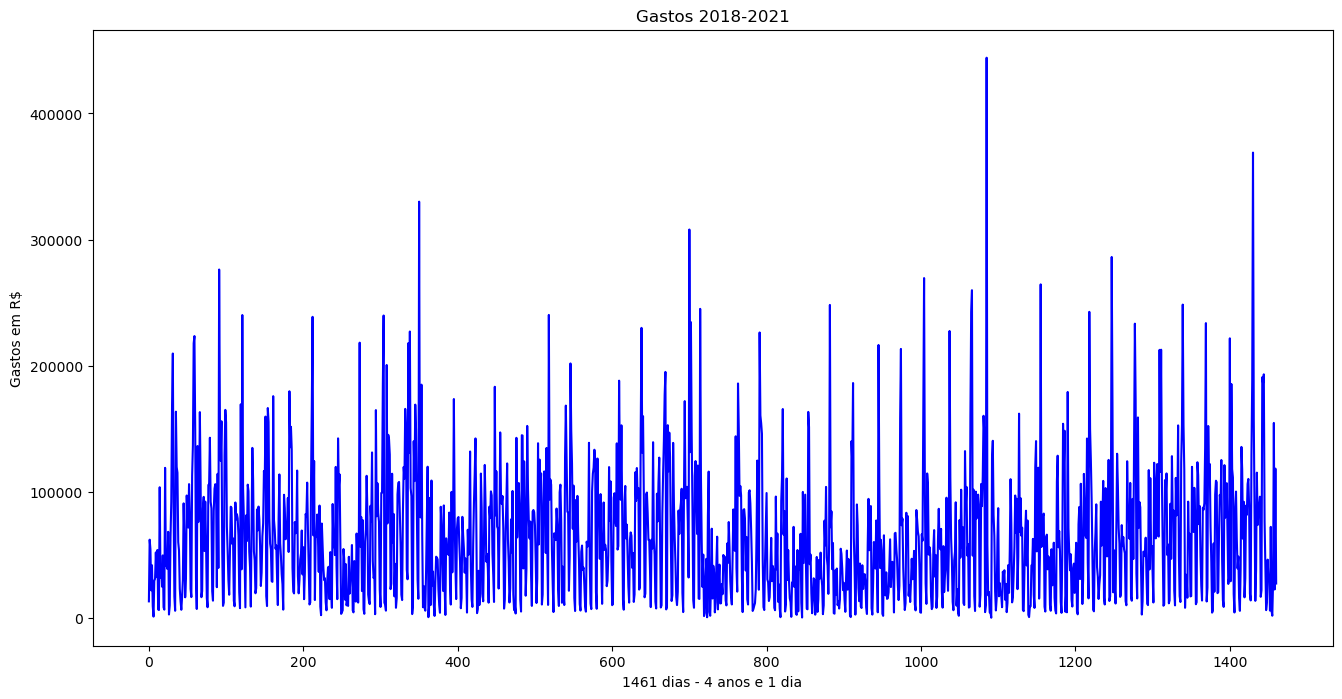

In [85]:
x = np.arange(0,len(dados))
y = np.array(dados["y"])

fig.figure(figsize=(16,8))
fig.title("Gastos 2018-2021")
fig.xlabel("1461 dias - 4 anos e 1 dia")
fig.ylabel("Gastos em R$")
fig.plot(x,y,'-b')

**Aqui farei uma seleção de gastos acima de 300k, pois notei alguns picos de gastos nos fins de cada ano durante 2018 até o final de 2021. Começando assim o primeiro *insight* do *forecasting*.**

In [86]:
selecao_maior300k = dados['y'] > 300000
df_gastos_maior300k = dados[selecao_maior300k]
df_gastos_maior300k = df_gastos_maior300k.sort_values(by='y')
df_gastos_maior300k

,ds,y
700,2019-12-02,307915.64
350,2018-12-17,330011.53
1430,2021-12-01,368914.08
1085,2020-12-21,444152.91


**Aqui podemos ver que a grosso modo os gastos apenas aumentam a cada fim de ano ao passar dos dias, mas teve um pico de gastos no dia 1085. Isso foi no final de 2020, mais especificamente em 21/12/2020 como podemos ver na tabela acima.**

**Agora utilizarei a regressão linear para descobrir a tendência desse conjunto de dados, como análise de *forecasting*.**

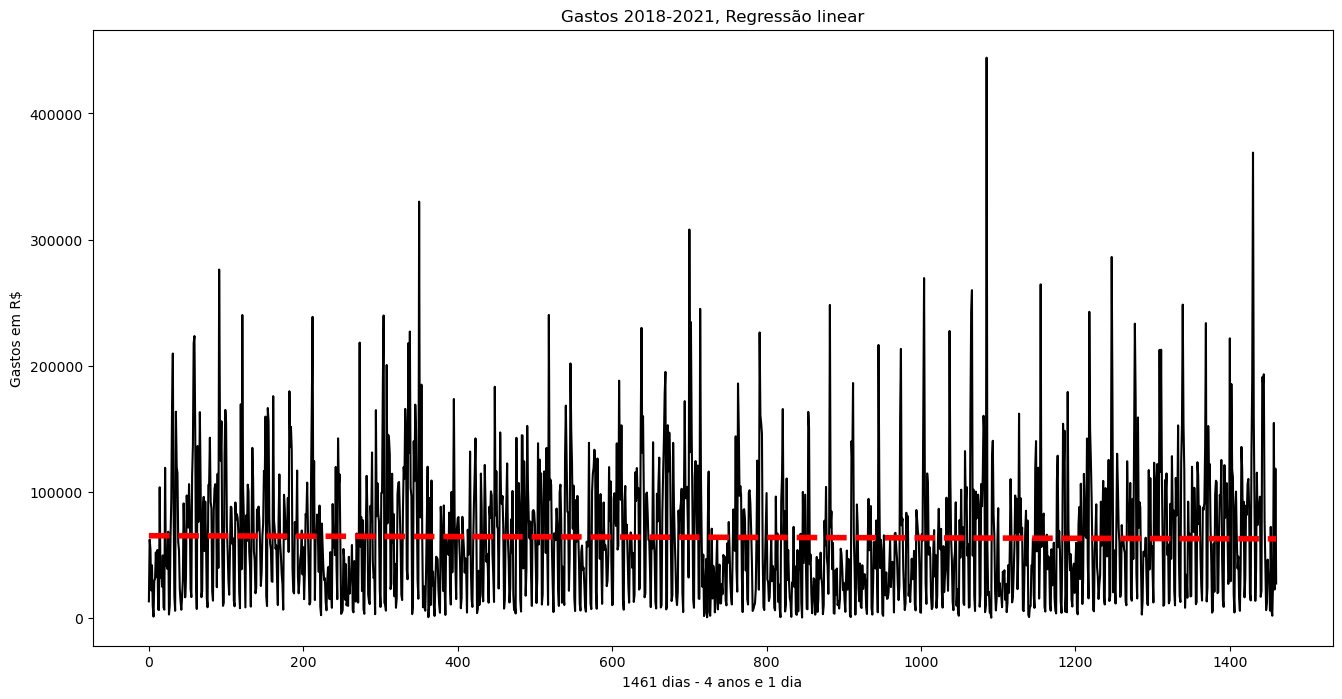

In [87]:
coef = np.polyfit(x, y, 1)
reg_lin = coef[0] * x + coef[1]

fig.figure(figsize=(16,8))
fig.title("Gastos 2018-2021, Regressão linear")
fig.xlabel("1461 dias - 4 anos e 1 dia")
fig.ylabel("Gastos em R$")
fig.plot(x,y,'-k')
fig.plot( x, reg_lin, '--r',lw=4)

In [88]:
print(f"Coeficiente angular --> {coef[0]}\nCoeficiente linear --> {coef[1]}")

Coeficiente angular --> -1.6927813505123874
Coeficiente linear --> 65111.77488279395


**Como podemos ver apesar dos gastos no fim do ano aumentarem ao longo dos dias os gastos no geral tem uma tendência de diminuição, podemos ver isso no coeficiente angular da reta que é negtivo.**

**Agora irei plotar um gráfico com a diferença dos vetores do arquivo original e dos valores da linha de tendência, que nada mais é que a volatilidade.**

Volatilidade (desvio padrão populacional) --> 53262.48


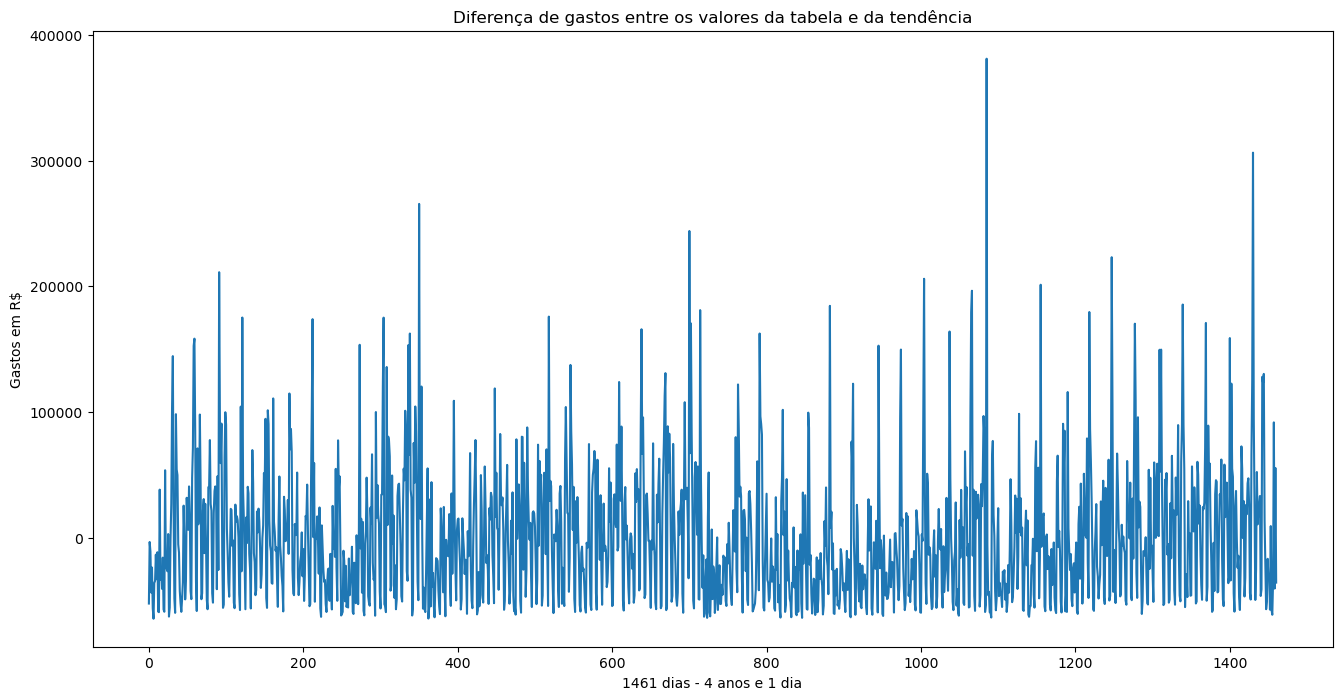

In [89]:
diferenca = dados['y'] - reg_lin
desvio = st.pstdev(diferenca)

fig.figure(figsize=(16,8))
fig.title("Diferença de gastos entre os valores da tabela e da tendência")
fig.xlabel("1461 dias - 4 anos e 1 dia")
fig.ylabel("Gastos em R$")
fig.plot(x, diferenca)

print(f"Volatilidade (desvio padrão populacional) --> {desvio:.2f}")

## Dia 3 finalizado
Podemos concluir que os gastos de fim de ano tem um pico mas em geral os gastos estão diminuindo com o tempo. A seguir utilizarei a função *describe* para poder ter uma ideia das estatísticas básicas sobre os gastos.

In [92]:
dados['y'].describe().round(2)

count      1461.00
mean      63876.04
std       53285.50
min         100.00
25%       19735.99
50%       53764.03
75%       91485.64
max      444152.91
Name: y, dtype: float64